In [135]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn import cluster, covariance, manifold
from datetime import datetime

#https://github.com/flo7up/relataly-public-python-tutorials/blob/master/042%20Vizualizing%20Stock%20Market%20Structures%20using%20Cluster%20Analysis%20in%20Python.ipynb
#https://www.relataly.com/crypto-market-cluster-analysis-using-affinity-propagation-python/8114/


In [136]:
assetMain='ACWI'
assetList=['AAXJ' ,'ACWI' ,'ASEA' ,'BMSCITH.BK','SPY','IGM']
colTarget='OtC_Pct'
noDay=60

In [137]:
from cryptocmd import CmcScraper

symbol_dict = {
   'XRP': 'Ripple',
    'ADA': 'Cardano',
    'USDT': 'Tether',
}
# Download historic crypto prices via CmcScraper
def load_fresh_data_and_save_to_disc(symbol_dict, save_path):
    # Initialize Coin Symbols List
    symbols, names = np.array(sorted(symbol_dict.items())).T
    for symbol in symbols:

        # Initialise scraper without time interval
        scraper = CmcScraper(symbol)

        # Pandas dataFrame for the same data
        df_coin_prices = scraper.get_dataframe()
        df = pd.DataFrame()
        print(f'fetching prices for {symbol}')
        df[symbol + '_Open'] = df_coin_prices['Open']
        df[symbol + '_Close'] = df_coin_prices['Close']
        df[symbol + '_Avg'] = (df_coin_prices['Close'] + df_coin_prices['Open']) / 2
        # Daily price fluctuations in percent
        df[symbol + '_p'] = (df_coin_prices['Open'] - df_coin_prices['Close']) / df_coin_prices['Open']
        
        if symbol == symbols[0]:
            # Create a new DataFrame for the first cryptocurrency in the list
            df_crypto = df.copy() 
        else:
            # Merge the new price data with the existing DataFrame
            df_crypto = pd.merge(
                left=df_crypto, right=df, how="outer",
                left_index=True, right_index=True)
        
        # Remove all cryptocurrencies that 
        filter_columns = [s for s in df_crypto.columns if '_p' in s]
        X_df_filtered = df_crypto[filter_columns].copy()
        
    X_df_filtered.to_csv(save_path + 'historical_crypto_prices.csv')
    return names, symbols, X_df_filtered

In [139]:
# If set to False the data will only be downloaded when you execute the code
# Set to True, if you want a fresh copy of the data.  
fetch_new_data = True 
save_path = '' # path where the price data will be stored in a csv file

# Fetch fresh data via the scraping package, or use data from the csv file on disk
if fetch_new_data == False:
    try:
        print('loading from disk')
        X_df_filtered = pd.read_csv(save_path + 'historical_crypto_prices.csv')
        if 'Unnamed: 0' in X_df_filtered.columns: 
            X_df_filtered = X_df_filtered.drop(['Unnamed: 0'], axis=1)
            symbols, names = np.array(sorted(symbol_dict.items())).T
        print(list(X_df_filtered.columns))
    except:
        print('no existing price data found - loading fresh data from coinmarketcap and saving them to disk')
        names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
        print(names)
        print(list(symbols))
else:
       print('loading fresh data from coinmarketcap and saving them to disk')
       names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
       print(names)
       print(list(symbols))
        

# Limit the price data to the last t days
t= 50 # in days
X_df_filtered = X_df_filtered[:t]
X_df_filtered.head()

loading fresh data from coinmarketcap and saving them to disk
fetching prices for ADA
fetching prices for USDT
fetching prices for XRP
['Cardano' 'Tether' 'Ripple']
['ADA', 'USDT', 'XRP']


,ADA_p,USDT_p,XRP_p
0,0.024822,-0.000094,-0.007882
1,0.049332,0.000105,0.059143
2,-0.007034,0.000073,-0.004290
3,-0.004161,0.000233,-0.001359
4,0.022750,-0.000171,-0.016620


# Step #1 Load & Cleas the Amibroker Data

In [119]:
dfAllAsset=pd.read_csv('data/15AssetBasket-60Days.csv', parse_dates=['Date/Time'],dayfirst=True)
dfAllAsset.rename(columns={'Date/Time':'Date'},inplace=True,)
dfAllAsset['Date']=dfAllAsset['Date'].apply( lambda  dx :  datetime(dx.year,dx.month,dx.day ))
print(dfAllAsset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Ticker   1200 non-null   object        
 1   Date     1200 non-null   datetime64[ns]
 2   OtC_Pct  1200 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 28.2+ KB
None


In [120]:
# assetList=dfAllAsset['Ticker'].unique()

print(assetList)

assetDict={}


for asset in assetList:
  dfTemp=dfAllAsset.query('Ticker==@asset')
  dfTemp=dfTemp.drop(columns=['Ticker'])
  dfTemp=dfTemp.rename(columns={colTarget:f'{asset}_{colTarget}'})  
  dfTemp=dfTemp.set_index('Date')
  dfTemp.sort_index(inplace=True)
  assetDict[asset]=dfTemp
  print(f"{asset} - {len(dfTemp)}")  
  print(dfTemp.tail())  
  print("-------------------------")

dfMain=assetDict[assetMain]
del assetDict[assetMain]
assetList.remove(assetMain)

['AAXJ', 'ACWI', 'ASEA', 'BMSCITH.BK', 'SPY', 'IGM']
AAXJ - 80
            AAXJ_OtC_Pct
Date                    
2022-11-14        0.0009
2022-11-15        0.0025
2022-11-16        0.0065
2022-11-17       -0.0239
2022-11-18        0.0042
-------------------------
ACWI - 80
            ACWI_OtC_Pct
Date                    
2022-11-14        0.0038
2022-11-15        0.0074
2022-11-16        0.0042
2022-11-17       -0.0138
2022-11-18        0.0042
-------------------------
ASEA - 80
            ASEA_OtC_Pct
Date                    
2022-11-14        0.0027
2022-11-15        0.0126
2022-11-16        0.0020
2022-11-17       -0.0082
2022-11-18        0.0027
-------------------------
BMSCITH.BK - 80
            BMSCITH.BK_OtC_Pct
Date                          
2022-11-14              0.0071
2022-11-15             -0.0044
2022-11-16              0.0062
2022-11-17             -0.0009
2022-11-18             -0.0045
-------------------------
SPY - 80
            SPY_OtC_Pct
Date                  

In [121]:
totalRown=noDay+(len(assetList)*noDay)
dfMain=dfMain.iloc[:noDay,:]
for item in assetList:
    dfMain=pd.merge(dfMain,assetDict[item],how='left',left_index=True,right_index=True)
    
dfMain=dfMain.reset_index(drop=True)
dfMain=dfMain.dropna()

print(dfMain.info())
dfMain.tail()

#dfMain.to_csv('assetOtcPct.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 59
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACWI_OtC_Pct        56 non-null     float64
 1   AAXJ_OtC_Pct        56 non-null     float64
 2   ASEA_OtC_Pct        56 non-null     float64
 3   BMSCITH.BK_OtC_Pct  56 non-null     float64
 4   SPY_OtC_Pct         56 non-null     float64
 5   IGM_OtC_Pct         56 non-null     float64
dtypes: float64(6)
memory usage: 3.1 KB
None


,ACWI_OtC_Pct,AAXJ_OtC_Pct,ASEA_OtC_Pct,BMSCITH.BK_OtC_Pct,SPY_OtC_Pct,IGM_OtC_Pct
55,-0.0067,-0.0067,-0.0007,-0.0066,-0.0077,-0.0114
56,0.0097,0.0134,0.0000,-0.0102,0.0107,0.0169
57,0.0023,0.0046,-0.0022,0.0018,0.0013,-0.0033
58,0.0055,0.0023,-0.0022,-0.0149,0.0071,-0.0023
59,-0.0241,-0.0157,-0.0117,-0.0018,-0.0251,-0.0308


# Step #2 Plotting Stock Charts


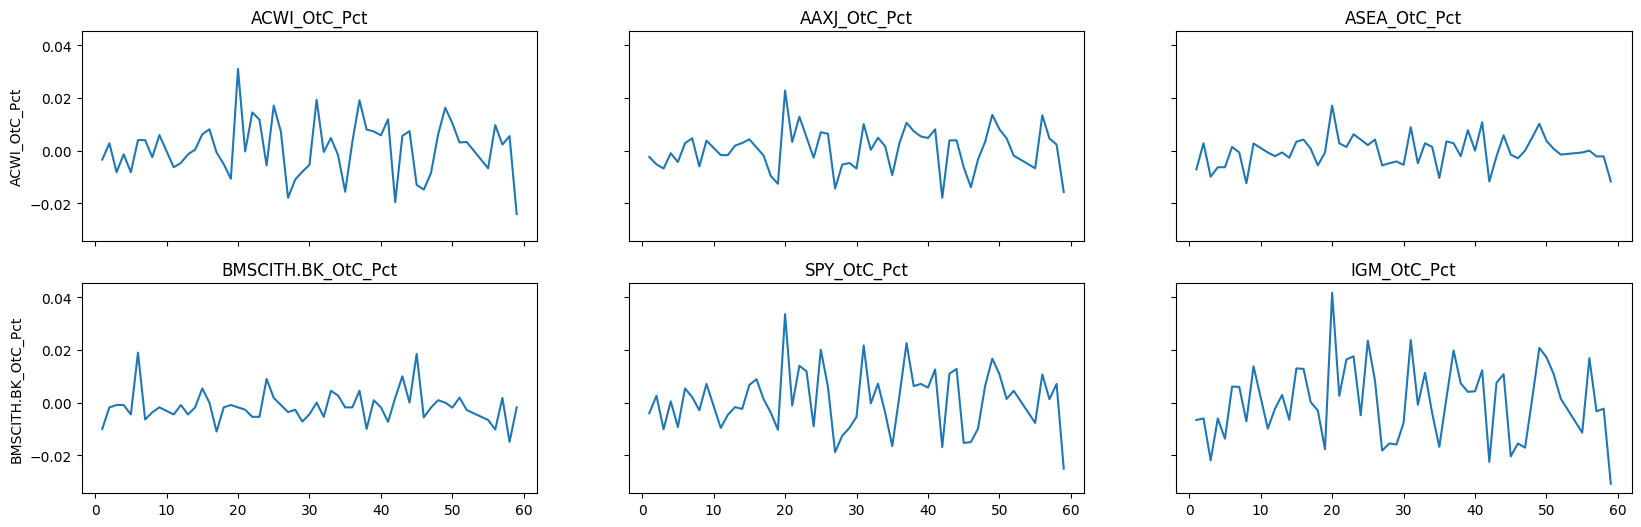

In [122]:
# Create Prices Charts for all Cryptocurrencies
list_length = dfMain.shape[1]
ncols = 3
nrows = int(round(list_length / ncols, 0))
height = list_length/2 if list_length > 30 else 6

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(20, height))
for i, ax in enumerate(fig.axes):
        if i < list_length:
            sns.lineplot(data=dfMain, x=dfMain.index, y=dfMain.iloc[:, i], ax=ax)
            ax.set_title(dfMain.columns[i])
plt.show()

# Step #3 Clustering Cryptocurrencies using Affinity Propagatio

In [154]:
names=[  x.replace(colTarget,'') for x in list(dfMain.columns)]
names=[  x.replace('_','') for x in names]
# names=list(dfMain.columns)
names

['ACWI', 'AAXJ', 'ASEA', 'BMSCITH.BK', 'SPY', 'IGM']

In [155]:

# Transpose the data to structure prices along columns
X = dfMain.copy()
X /= X.std(axis=0)
X = np.array(X)

X[:5]


array([[-0.32204373, -0.30228174, -1.22351836, -1.66444319, -0.34784677,
        -0.46185616],
       [ 0.26521248, -0.65494378,  0.48251428, -0.29959977,  0.2261004 ,
        -0.41986924],
       [-0.77669369, -0.85646494, -1.70603265, -0.14979989, -0.8783131 ,
        -1.53252273],
       [-0.13260624, -0.12595073, -1.08565714, -0.14979989,  0.04348085,
        -0.41986924],
       [-0.77669369, -0.54158812, -1.08565714, -0.74899944, -0.80874374,
        -0.95870143]])

In [156]:
# Define an edge model based on covariance
edge_model = covariance.GraphicalLassoCV()

# Standardize the time series
edge_model.fit(X)

# Group cryptos to clusters using affinity propagation
# The number of clusters will be determined by the algorithm
cluster_centers_indices , labels = cluster.affinity_propagation(edge_model.covariance_, random_state=1)
cluster_dict = {}
n_labels = labels.max()
print(f"{n_labels} Clusters")




D:\ProgramData\Anaconda3\envs\ml-ai\lib\site-packages\sklearn\covariance\_graph_lasso.py:291: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
D:\ProgramData\Anaconda3\envs\ml-ai\lib\site-packages\sklearn\covariance\_graph_lasso.py:292: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs


2 Clusters


D:\ProgramData\Anaconda3\envs\ml-ai\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [164]:
labelsList= list(zip(names, labels))
dfClusterSummary=pd.DataFrame (labelsList,columns=['Asset','Cluster'])
dfClusterSummary=dfClusterSummary.sort_values(by='Cluster')
dfClusterSummary

,Asset,Cluster
0,ACWI,0
1,AAXJ,0
4,SPY,0
5,IGM,0
2,ASEA,1
3,BMSCITH.BK,2
